<a href="https://colab.research.google.com/github/jadams1313/DS220Repo/blob/main/DS220_Project2%20(finished%20EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading Dataset into Pandas

In [3]:
Coffee = pd.read_csv('arabica_coffee_data.csv')

Background about Dataset:

This dataset contains the milling, company, and product info for over 1000 kinds of Arabica-style coffee grown all over the world. Each coffee is also graded based on key attributes, incluing aroma, flavor, aftertaste, acidity, etc. and is given an overall score out of 100. This allows us to draw many insights that can be very interesting. For example, are the flavor attributes correlated to a coffee's score? What attribute was most important in the grading of each coffee? These insights can be used for a multitude of other projects and real-world implications. For example, coffee companies could use these insights to further research into coffee's that were scored very high. Also, the insights could break ground on which regions, altitudes, and settings coffee grows most flavorful, aromatic, etc.

Framing Questions for EDA:

1. Does the country the coffee was grown affect it's aroma score?

2. Does the country the coffee was grown in affect it's flavor score?

3. Does the altitude the coffee was grown at have an impact on its flavor or other attributes?

4. Which country grows the most coffee?

5. Which coffee attribute is most important in a coffee's grading?

6. Which species of coffee has the best flavor? Graded the lowest?

....

Exploratory Data Analysis

What columns are available for us to consider in our data analysis?

In [4]:
Coffee.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

How clean is the data? Does anything need to be done? How is it arranged?

In [5]:
Coffee.head(10)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,6,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,7,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,...,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,8,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
8,9,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
9,10,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,...,Green,4,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5


Looking specifically at the Aroma, Flavor, Country, and Altitude of cases in the dataset

In [6]:
Coffee.head(10)[['Aroma','Flavor','Country.of.Origin','altitude_mean_meters']]

,Aroma,Flavor,Country.of.Origin,altitude_mean_meters
0,8.67,8.83,Ethiopia,2075.0
1,8.75,8.67,Ethiopia,2075.0
2,8.42,8.50,Guatemala,1700.0
3,8.17,8.58,Ethiopia,2000.0
4,8.25,8.50,Ethiopia,2075.0
5,8.58,8.42,Brazil,NaN
6,8.42,8.50,Peru,NaN
7,8.25,8.33,Ethiopia,1635.0
8,8.67,8.67,Ethiopia,1635.0
9,8.08,8.58,Ethiopia,1822.5


SUBMIT INDIVUDALLY

What we are being graded on?

Motivation/Relevance: Does the tutorial make the reader believe the topic is important (a) in general and (b) with respect to data analysis/data science?

• Ease of Understanding: is it easy to process the topic?

• Prose: Does the prose in the Markdown portion of the .ipynb add to the reader’s understanding of the tutorial and does it connect well with the code that it describes?

• Code: Does the code help solidify understanding, is it well documented, and does it include helpful examples?

• Presentation: Attractiveness and Ease of Processing on the Web

• Persuasiveness: Level to which topic is presented as relevant, originality of the questions asked, and how the data is used to craft a story to address the questions

• Useful resources: other resources that would help the reader understand basic concepts, deep dive, related work, etc?

2. Does the country the coffee was grown in affect it's flavor score?

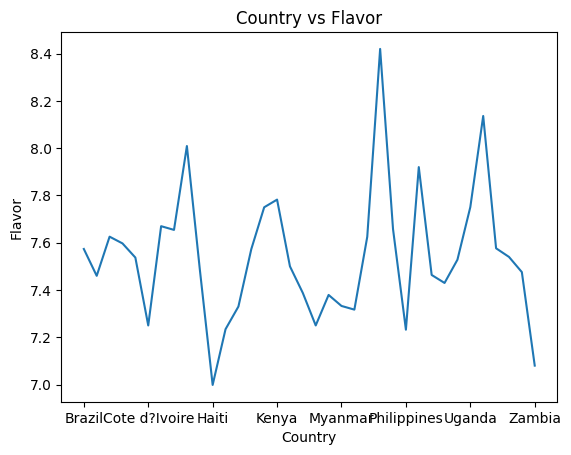

In [10]:
FlavorbyCountry = Coffee[['Country.of.Origin','Flavor']]

df = pd.DataFrame(FlavorbyCountry)

grouped_df = df.groupby('Country.of.Origin')['Flavor'].mean()

# Plotting using Matplotlib and Pandas
grouped_df.plot(x='Country.of.Origin', y='Flavor', kind='line', title='Country vs Flavor')
plt.xlabel('Country')
plt.ylabel('Flavor')
plt.show()

4. Which country grows the most coffee?

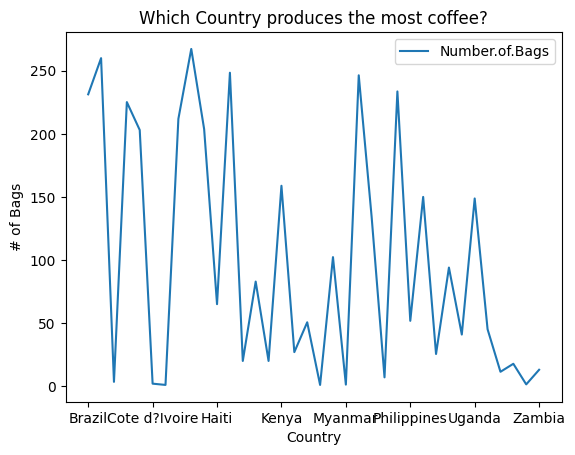

In [14]:
MostCoffee = Coffee[['Country.of.Origin','Number.of.Bags']]

df = pd.DataFrame(MostCoffee)

grouped_df = df.groupby('Country.of.Origin')['Number.of.Bags'].mean()

# Plotting using Matplotlib and Pandas
grouped_df.plot(x='Country.of.Origin', y='Number.of.Bags', kind='line', title='Which Country produces the most coffee?')
plt.xlabel('Country')
plt.ylabel('# of Bags')
plt.legend()
plt.show()

6. Which species of coffee has the best flavor? Graded the lowest?

In [21]:
AltitudeTotalScore= Coffee[['altitude_mean_meters','Total.Cup.Points']]
AltitudeTotalScore

,altitude_mean_meters,Total.Cup.Points
0,2075.00,90.58
1,2075.00,89.92
2,1700.00,89.75
3,2000.00,89.00
4,2075.00,88.83
...,...,...
1306,900.00,68.33
1307,350.00,67.92
1308,1100.00,63.08
1309,1417.32,59.83


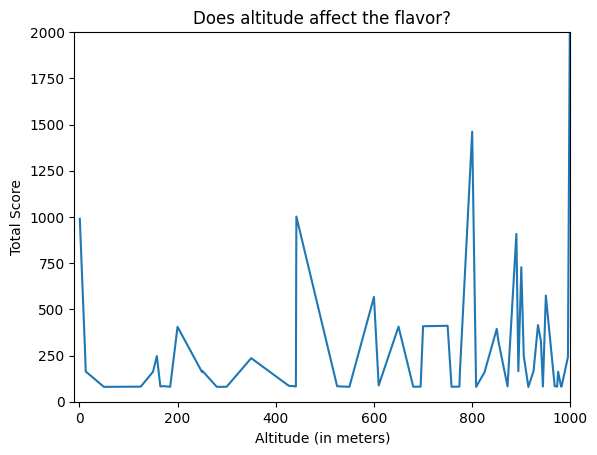

In [19]:
AltitudeTotalScore= Coffee[['altitude_mean_meters','Total.Cup.Points']]

df = pd.DataFrame(AltitudeTotalScore)

grouped_df = df.groupby('altitude_mean_meters')['Total.Cup.Points'].sum()

# Plotting using Matplotlib and Pandas
grouped_df.plot(x='altitude_mean_meters', y='Total.Cup.Points', kind='line', title='Does altitude affect the flavor?')
plt.xlabel('Altitude (in meters)')
plt.ylabel('Total Score')
plt.xlim(-10, 1500)
plt.ylim(0,2000)
plt.show()